# 영업 성공 여부 분류 경진대회

## 1. 데이터 확인

### 필수 라이브러리

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

C:\Users\HamIG\AppData\Local\Temp\ipykernel_41352\3824362204.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 데이터 셋 읽어오기

### 1.1 데이터 불러오기 

In [4]:
df_train = pd.read_csv("../data/train.csv") # 학습용 데이터
df_test = pd.read_csv("../data/submission.csv") # 테스트 데이터(제출파일의 데이터)

In [5]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [6]:
df_test.head()

,id,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,19844,0.00,/ / Brazil,ID,0.073248,47466,End Customer,Enterprise,53.0,NaN,...,LGESP,NaN,1,0,0.001183,0.049840,retail,Electronics & Telco,278,True
1,9738,0.25,400 N State Of Franklin Rd Cloud IT / Johnson...,IT,NaN,5405,End Customer,SMB,NaN,NaN,...,LGEUS,NaN,0,0,0.000013,NaN,transportation,Others,437,True
2,8491,1.00,/ / U.A.E,ID,NaN,13597,Specifier/ Influencer,SMB,NaN,NaN,...,LGEGF,less than 3 months,0,0,0.000060,0.131148,hospital & health care,General Hospital,874,True
3,19895,0.50,/ Madison / United States,ID,0.118644,17204,NaN,Enterprise,NaN,NaN,...,LGEUS,more than a year,0,0,0.001183,0.049840,retail,NaN,194,False
4,10465,1.00,/ Sao Paulo / Brazil,ID,0.074949,2329,End Customer,Enterprise,2.0,1.0,...,LGESP,less than 3 months,1,1,0.003079,0.064566,corporate / office,Engineering,167,False


### 1-2. 데이터셋 파악

#### 데이터 타입 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

#### 타입별 개수 

In [8]:
df_train.dtypes.value_counts()

object     15
float64     8
int64       5
bool        1
Name: count, dtype: int64

#### 박스플롯(수치형)

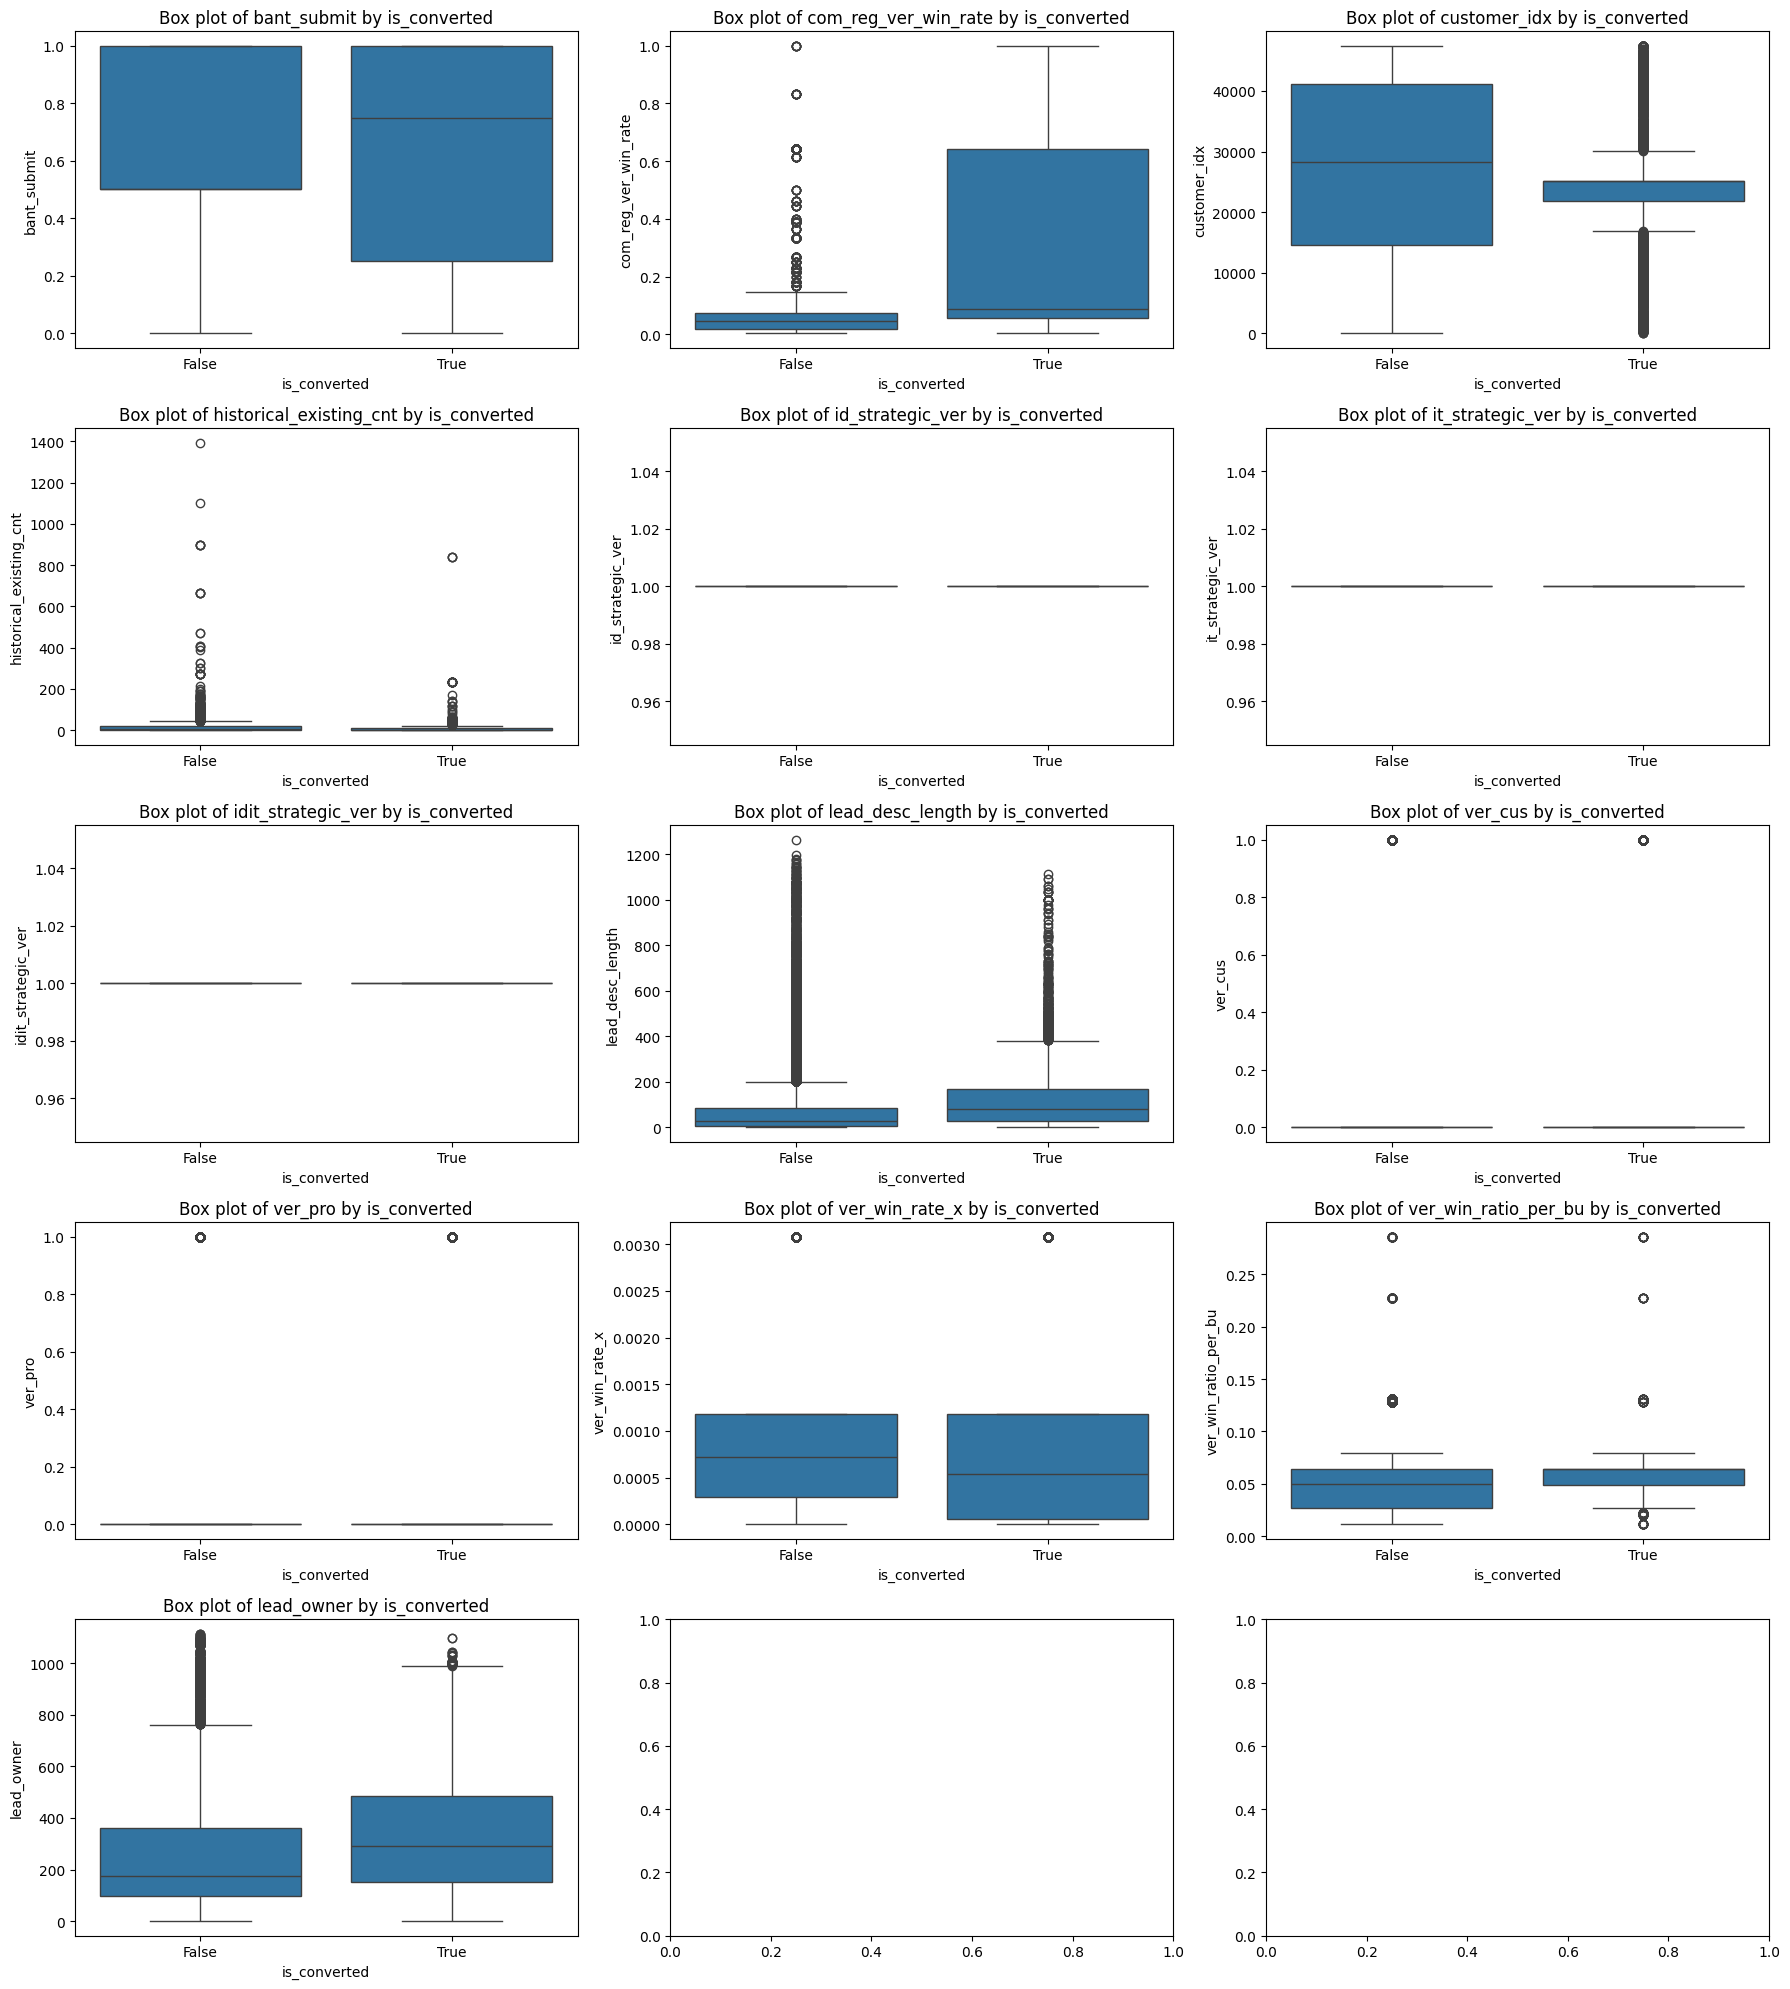

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 선택
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 변수의 개수에 따라 적절한 행과 열의 개수 설정
n = len(numeric_vars)
ncols = 3  # 열의 개수를 설정
nrows = n // ncols if n % ncols == 0 else n // ncols + 1  # 행의 개수 계산

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))

for i, var in enumerate(numeric_vars):
    r = i // ncols
    c = i % ncols
    sns.boxplot(x='is_converted', y=var, data=df_train, ax=axs[r, c])
    axs[r, c].set_title('Box plot of ' + var + ' by is_converted')

plt.tight_layout()
plt.show()

#### 변수별 통계량 산출

In [10]:
df_train.describe()

,bant_submit,com_reg_ver_win_rate,customer_idx,historical_existing_cnt,id_strategic_ver,it_strategic_ver,idit_strategic_ver,lead_desc_length,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,lead_owner
count,59299.000000,14568.000000,59299.000000,13756.000000,3444.0,1121.0,4565.0,59299.000000,59299.000000,59299.000000,18417.000000,15304.000000,59299.000000
mean,0.634593,0.091685,27114.556333,19.912184,1.0,1.0,1.0,79.271590,0.041603,0.050810,0.001117,0.049288,262.563888
std,0.286066,0.150988,14653.911888,44.697938,0.0,0.0,0.0,132.551067,0.199681,0.219612,0.001104,0.027949,231.605681
min,0.000000,0.003788,2.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,0.000000,0.000002,0.011583,0.000000
25%,0.500000,0.019900,14913.000000,1.000000,1.0,1.0,1.0,7.000000,0.000000,0.000000,0.000298,0.026846,97.000000
50%,0.500000,0.049180,26774.000000,4.000000,1.0,1.0,1.0,29.000000,0.000000,0.000000,0.000572,0.049840,175.000000
75%,1.000000,0.074949,40368.500000,19.000000,1.0,1.0,1.0,92.000000,0.000000,0.000000,0.001183,0.064566,374.000000
max,1.000000,1.000000,47466.000000,1394.000000,1.0,1.0,1.0,1264.000000,1.000000,1.000000,0.003079,0.285714,1114.000000


#### 범주형 변수 속 카테고리 개수 파악

In [11]:
df_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

customer_country       15399
business_unit              5
customer_type             33
enterprise                 2
customer_job             560
inquiry_type              71
product_category         357
product_subcategory      330
product_modelname        665
customer_country.1     15399
customer_position        117
response_corporate        53
expected_timeline        449
business_area             12
business_subarea          86
dtype: int64

#### 나라끼리 묶기

In [13]:
import numpy as np

def process_customer_country(df):
    for i, entry in enumerate(df["customer_country"]):
        if isinstance(entry, str):
            if entry.count('/') == 2:
                last_slash_index = entry.rfind('/')
                if last_slash_index != -1 and last_slash_index != len(entry) - 1:
                    df.at[i, "customer_country"] = entry[last_slash_index + 1:].strip()
                else:
                    df.at[i, "customer_country"] = np.nan
            else:
                df.at[i, "customer_country"] = np.nan
        else:
            df.at[i, "customer_country"] = np.nan
    return df

df_train = process_customer_country(df_train)

#### 범주형 변수 파악 

##### customer_country

In [43]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_country'].unique(), columns=['customer_country'])
counts = df_train['customer_country'].value_counts()
table_df['count'] = counts.reset_index(drop=True)

# 테이블 출력
table_df

,customer_country,count
0,Philippines,16707.0
1,India,7978.0
2,Nigeria,3708.0
3,Saudi Arabia,2494.0
4,Singapore,2287.0
5,Brazil,1915.0
6,U.A.E,1587.0
7,South Africa,1441.0
8,United States,1409.0
9,Colombia,1196.0


##### business_unit

In [44]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['business_unit'].unique(), columns=['business_unit'])
counts = df_train['business_unit'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,business_unit,count
0,AS,25563
1,ID,24774
2,IT,8664
3,Solution,296
4,CM,2


##### customer_type

In [45]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_type'].unique(), columns=['customer_type'])
counts = df_train['customer_type'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,customer_type,count
0,End-Customer,6647.0
1,Specifier/ Influencer,3996.0
2,Service Partner,2525.0
3,Channel Partner,1368.0
4,NaN,349.0
5,Corporate,146.0
6,End Customer,52.0
7,Specifier / Influencer,43.0
8,Solution Eco-Partner,31.0
9,Distributor,23.0


##### enterprise

In [46]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['enterprise'].unique(), columns=['enterprise'])
counts = df_train['enterprise'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,enterprise,count
0,Enterprise,37783
1,SMB,21516


##### customer_job

In [47]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_job'].unique(), columns=['customer_job'])
counts = df_train['customer_job'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,customer_job,count
0,purchasing,6342.0
1,media and communication,4852.0
2,engineering,3359.0
3,entrepreneurship,2287.0
4,consulting,2218.0
5,program and project management,1961.0
6,sales,1938.0
7,other,1937.0
8,operations,1801.0
9,NaN,1349.0


##### inquiry_type

In [48]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['inquiry_type'].unique(), columns=['inquiry_type'])
counts = df_train['inquiry_type'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,inquiry_type,count
0,Quotation or purchase consultation,23274.0
1,Product Information,18766.0
2,Quotation or Purchase Consultation,9977.0
3,Other,1237.0
4,Usage or technical consultation,929.0
5,Trainings,668.0
6,Services,434.0
7,Sales Inquiry,429.0
8,Etc.,415.0
9,Technical Support,352.0


##### product_category

In [49]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['product_category'].unique(), columns=['product_category'])
counts = df_train['product_category'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,product_category,count
0,multi-split,6154.0
1,single-split,5640.0
2,vrf,3674.0
3,chiller,2029.0
4,etc.,2018.0
5,rac,1895.0
6,teto ou cassete inverter,1862.0
7,NaN,1569.0
8,software solution,1447.0
9,all lg vrf systems,1350.0


##### product_subcategory

In [50]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['product_subcategory'].unique(), columns=['product_subcategory'])
counts = df_train['product_subcategory'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,product_subcategory,count
0,NaN,446.0
1,New High Haze UHD Standard Signage,417.0
2,Window Facing Display,374.0
3,LG CreateBoard,288.0
4,UR640S Series,284.0
5,TR3DJ Series,280.0
6,webOS UHD Signage,268.0
7,TN3F Series,246.0
8,SM3G Series,243.0
9,"55"" 500 nits FHD 0.44mm Even Bezel Video Wall",228.0


##### product_modelname

In [51]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['product_modelname'].unique(), columns=['product_modelname'])
counts = df_train['product_modelname'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,product_modelname,count
0,NaN,523.0
1,98UH5J-H,479.0
2,75XS4G,350.0
3,86TR3DK,290.0
4,43UR640S,261.0
5,86TR3DJ,199.0
6,75UL3J-B,167.0
7,22SM3G-B,167.0
8,55VSM5J,159.0
9,55UH5F-H,152.0


##### customer_position

In [52]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['customer_position'].unique(), columns=['customer_position'])
counts = df_train['customer_position'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,customer_position,count
0,entry level,19680
1,ceo/founder,8217
2,partner,7984
3,manager,6499
4,vice president,4843
5,associate/analyst,2597
6,c-level executive,2536
7,none,2216
8,director,964
9,other,851


##### response_corporate

In [53]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['response_corporate'].unique(), columns=['response_corporate'])
counts = df_train['response_corporate'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,response_corporate,count
0,LGEPH,16908
1,LGEIL,9311
2,LGEAF,5955
3,LGESJ,2768
4,LGESL,2651
5,LGESP,2149
6,LGEGF,2079
7,LGESA,1651
8,LGEUS,1469
9,LGECB,1339


##### expected_timeline

In [54]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['expected_timeline'].unique(), columns=['expected_timeline'])
counts = df_train['expected_timeline'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,expected_timeline,count
0,less than 3 months,17250.0
1,NaN,5026.0
2,3 months ~ 6 months,3023.0
3,9 months ~ 1 year,1101.0
4,more than a year,1098.0
5,6 months ~ 9 months,108.0
6,quote has been sent to customer.,95.0
7,partner was exploring on eol model for some re...,76.0
8,already close in july purchse with rd,66.0
9,client not interested in product.. receing cal...,24.0


##### business_area

In [55]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['business_area'].unique(), columns=['business_area'])
counts = df_train['business_area'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,business_area,count
0,corporate / office,4097.0
1,NaN,3011.0
2,education,2013.0
3,hotel & accommodation,1929.0
4,hospital & health care,1818.0
5,special purpose,1727.0
6,residential (home),1199.0
7,government department,1035.0
8,retail,650.0
9,factory,519.0


##### business_subarea

In [56]:
# 데이터프레임 생성
table_df = pd.DataFrame(df_train['business_subarea'].unique(), columns=['business_subarea'])
counts = df_train['business_subarea'].value_counts()
table_df['count'] = counts.reset_index(drop=True)
# 테이블 출력
table_df

,business_subarea,count
0,Engineering,1740.0
1,Advertising,280.0
2,Construction,267.0
3,IT/Software,196.0
4,NaN,191.0
5,Manufacturing,186.0
6,Energy,183.0
7,Developer/Property,172.0
8,Entertainment,163.0
9,Agriculture,135.0


#### 타깃 변수 비율 비교 

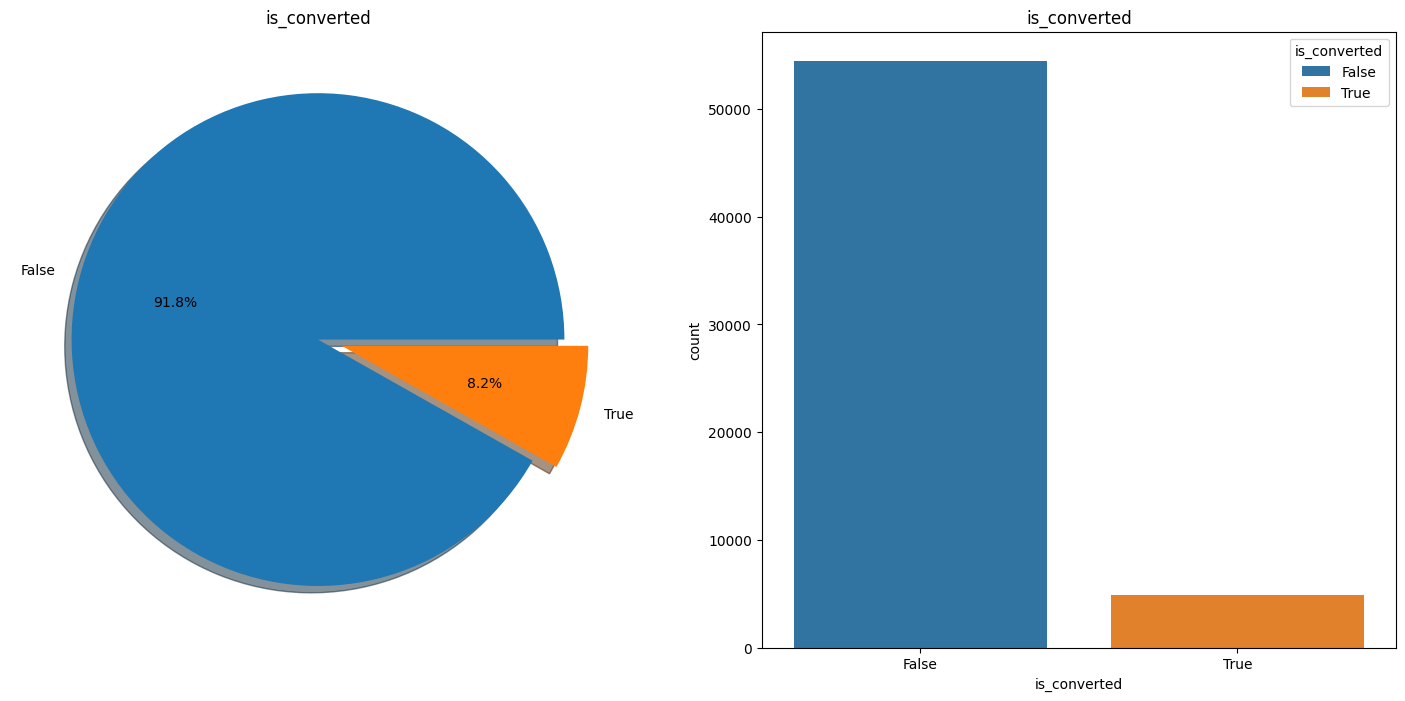

In [11]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['is_converted'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('is_converted')
ax[0].set_ylabel('')
sns.countplot(x = 'is_converted', hue='is_converted', data = df_train, ax=ax[1])
ax[1].set_title('is_converted')
plt.show()

#### 범주형 변수 business_unit과 타깃 변수 is_converted와의 관계 
#### business_unit 내의 그룹 중에서 어떤 그룹이 고객 전환 여부에 영향을 끼칠지 파악
#### 이를 위해 business_unit 내 그룹 대비 is_converted의 비율을 계산해서 그래프 산출

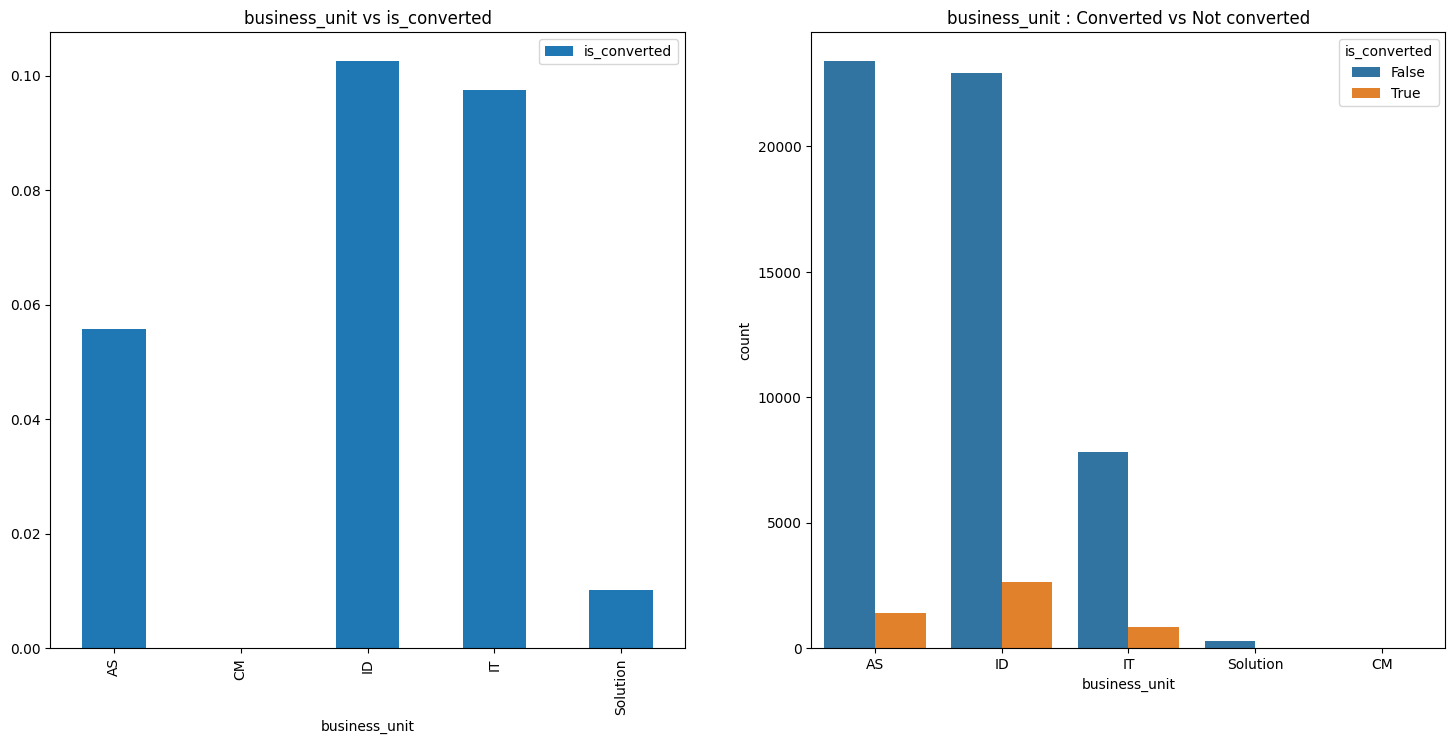

In [62]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train[['business_unit','is_converted']].groupby(['business_unit']).mean().plot.bar(ax=ax[0])
ax[0].set_title('business_unit vs is_converted')
sns.countplot(x = 'business_unit',hue='is_converted',data = df_train,ax=ax[1])
ax[1].set_title('business_unit : Converted vs Not converted')
plt.show()

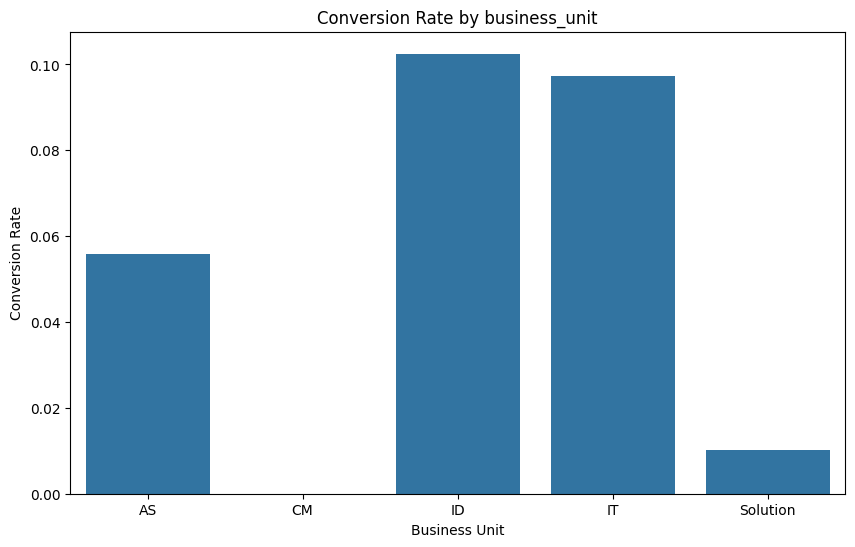

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그림 생성
plt.figure(figsize=(10, 6))

# business_unit 별 is_converted 비율 계산
conversion_rate = df_train.groupby('business_unit')['is_converted'].mean().reset_index()

# 그래프 그리기
sns.barplot(x='business_unit', y='is_converted', data=conversion_rate)
plt.title('Conversion Rate by business_unit')
plt.xlabel('Business Unit')
plt.ylabel('Conversion Rate')
plt.show()


In [ ]:
# business_unit이 ID일 때, 전환 고객 수가 가장 많음. 
# 따라서, ID 그룹에 속하면 고객으로 전환될 가능성이 높다고 결론 내릴 수 있음. 
# 범주형 변수 껴 있을 때, 이런 식으로 EDA 하길래 따라 해봄.  

## 2. 데이터 전처리

### 레이블 인코딩

In [9]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [10]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

다시 학습 데이터와 제출 데이터를 분리합니다.

In [11]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 2-2. 학습, 검증 데이터 분리

In [12]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

## 3. 모델 학습

### 모델 정의 

In [1]:
# pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.3 MB 5.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 7.5 MB/s eta 0:00:01
   --------------------------- ------------ 0.9/1.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 7.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
from lightgbm import LGBMClassifier

# LightGBM 
model = LGBMClassifier()

### 모델 학습

In [14]:
model.fit(x_train.fillna(0), y_train)

[LightGBM] [Info] Number of positive: 3903, number of negative: 43536
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2702
[LightGBM] [Info] Number of data points in the train set: 47439, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.082274 -> initscore=-2.411843
[LightGBM] [Info] Start training from score -2.411843


LGBMClassifier()

### 모델 성능 보기

In [15]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [16]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

오차행렬:
 [[  659   288]
 [   65 10848]]

정확도: 0.9702
정밀도: 0.9102
재현율: 0.6959
F1: 0.7887


## 4. 제출하기

### 테스트 데이터 예측

In [12]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [13]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

1157

### 제출 파일 작성

In [14]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**